In [1]:
#just importing packages
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

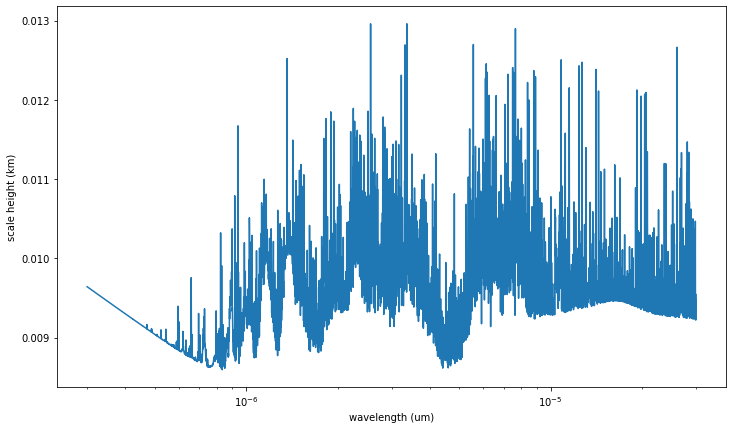

In [2]:
#load transit depth and wavelengths for Earth
jupiter_wave, jupiter_trans = np.loadtxt('/Users/saravannah/Exo_Transmit/Spectra/jupiter.dat', 
                                         unpack=True, skiprows=2)
earth_wave, earth_trans = np.loadtxt('/Users/saravannah/Exo_Transmit/Spectra/earth.dat', 
                                     unpack=True, skiprows=2)
plt.plot(earth_wave, earth_trans)
plt.xscale('log')
plt.xlabel('wavelength (um)')
plt.ylabel('scale height (km)')
plt.gcf().set_size_inches(12, 7)

In [3]:
#This cell is the Djs calculation
def get_djs(spec1, spec2):

    #compute modal fractions

    p, q = spec1/sum(spec1), spec2/sum(spec2)
    r = 1/2 * (p+q)

    Djs = 1/2 * np.sum(p*np.log(p/r)) + 1/2 * np.sum(q*np.log(q/r))

    return Djs

In [4]:
#grabbed a bubble sort algorithm from here: https://www.geeksforgeeks.org/python-program-for-bubble-sort/
#copied but modified slightly to sort not just pressure array but associated names array

# Python program for implementation of Bubble Sort
 
def bubbleSort(ps, names):
    n = len(ps)
 
    # Traverse through all array elements
    for i in range(n-1):
    # range(n) also work but outer loop will
    # repeat one time more than needed.
 
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if ps[j] > ps[j + 1] :
                ps[j], ps[j + 1] = ps[j + 1], ps[j]
                names[j], names[j+1] = names[j+1], names[j]
                

In [5]:
path_clouds = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_clouds/'
from os import listdir
names_clouds = listdir(path_clouds)
#remove .DS_Store and any other weird file stuff
names_clouds = [n for n in names_clouds if '.txt' in n]

#organize cloud pressure

import re
pressures = []
for n in names_clouds:
    p = re.findall('[0-9]+',n) #get the integer from name string
    p = 10**int(p[0]) #fix formatting to be an integer
    pressures.append(p) #append pressure integer to list
    
bubbleSort(pressures, names_clouds)

In [6]:
spectra_clouds = [np.loadtxt(path_clouds+n, unpack=True, skiprows=2) for n in names_clouds if '.txt' in n]


In [7]:
clouds_djs_earth = []
for n in range(7):
    clouds_djs_earth.append(get_djs(spectra_clouds[n][1], earth_trans))
    
clouds_djs_jupiter = []
for n in range(7):
    clouds_djs_jupiter.append(get_djs(spectra_clouds[n][1], jupiter_trans))
    
    

cloud_pressure = ['1e'+str(p) for p in pressures]
#cloud_pressure = [1e4, 1e5, 1e7, 1e6, 1e2, 1e3, 1e1]
print(cloud_pressure)

['1e10', '1e100', '1e1000', '1e10000', '1e100000', '1e1000000', '1e10000000']


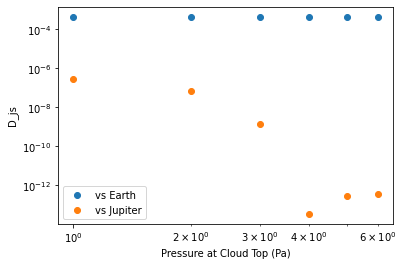

In [8]:
plt.scatter(cloud_pressure, clouds_djs_earth, label='vs Earth')
plt.scatter(cloud_pressure, clouds_djs_jupiter, label='vs Jupiter')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Pressure at Cloud Top (Pa)')
plt.ylabel('D_js')
plt.legend()
plt.show()

In [9]:
path_temp = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_temp/'
names_temp = listdir(path_temp)
print(names_temp)

#remove .DS_Store and any other weird file stuff
names_temp = [n for n in names_temp if '.txt' in n]

#organize

temps = []
for n in names_temp:
    t = int(re.search(r'\d+', n).group()) #get the integer from name string
    #t = int(t[0]) #fix formatting to be an integer
    temps.append(t) #append pressure integer to list

    

bubbleSort(temps, names_temp)
spectra_temp = [np.loadtxt(path_temp+n, unpack=True, skiprows=2) for n in names_temp]

['jupiter_1100K.txt', 'jupiter_700K.txt', 'jupiter_500K.txt', 'jupiter_900K.txt', 'jupiter_1300K.txt', 'jupiter_1500K.txt', 'jupiter_600K.txt', 'jupiter_1000K.txt', 'jupiter_1200K.txt', 'jupiter_400K.txt', 'jupiter_800K.txt', 'jupiter_1400K.txt']


In [10]:
temp_djs_earth = []
for n in range(12):
    temp_djs_earth.append(get_djs(spectra_temp[n][1], earth_trans))
    
temp_djs_jupiter = []
for n in range(12):
    temp_djs_jupiter.append(get_djs(spectra_temp[n][1], jupiter_trans))
    
#temp = [1500, 700, 1100, 1300, 900, 500, 1400, 1000, 600, 800, 400, 1200]

In [11]:
path_grav = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_grav/'
names_grav = listdir(path_grav)
print(names_grav)

#remove .DS_Store and any other weird file stuff
names_grav = [n for n in names_grav if '.txt' in n]

gravs = []
for n in names_grav:
    g = int(re.search(r'\d+', n).group()) #get the integer from name string
    #t = int(t[0]) #fix formatting to be an integer
    gravs.append(g) #append pressure integer to list
    

bubbleSort(names_grav, gravs)

spectra_grav = [np.loadtxt(path_grav+n, unpack=True, skiprows=2) for n in names_grav]

['jupiter_gravity_28.txt', 'jupiter_gravity_4.txt', 'jupiter_gravity_16.txt', 'jupiter_gravity_12.txt', 'jupiter_gravity_20.txt', 'jupiter_gravity_32.txt', 'jupiter_gravity_24.txt', 'jupiter_gravity_8.txt']


In [12]:
grav_djs_earth = []
for n in range(8):
    grav_djs_earth.append(get_djs(spectra_grav[n][1], earth_trans))
    
grav_djs_jupiter = []
for n in range(8):
    grav_djs_jupiter.append(get_djs(spectra_grav[n][1], jupiter_trans))
    

In [13]:
path_planet_rad = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_planet_rad/'
names_planet_rad = listdir(path_planet_rad)
print(names_planet_rad)

#remove .DS_Store and any other weird file stuff
names_planet_rad = [n for n in names_planet_rad if '.txt' in n]


planet_rads = []
for n in names_planet_rad:
    
    r_list = re.findall(r'\d+', n) #gets a list of all the integerts in a string
    r = int(r_list[0])*10**int(r_list[1]) #converts to scientific notation
    planet_rads.append(r) #append pressure integer to list

bubbleSort(names_planet_rad, planet_rads)
    
spectra_planet_rad = [np.loadtxt(path_planet_rad+n, unpack=True, skiprows=2) for n in names_planet_rad]

['jupiter_planet_radius_8E6.txt', 'jupiter_planet_radius_8E7.txt', 'jupiter_planet_radius_1E8.txt', 'jupiter_planet_radius_1E7.txt', 'jupiter_planet_radius_2E7.txt', 'jupiter_planet_radius_4E7.txt', 'jupiter_planet_radius_4E6.txt', 'jupiter_planet_radius_6E6.txt', 'jupiter_planet_radius_6E7.txt']


In [14]:
planet_rad_djs_earth = []
for n in range(9):
    planet_rad_djs_earth.append(get_djs(spectra_planet_rad[n][1], earth_trans))
    
planet_rad_djs_jupiter = []
for n in range(9):
    planet_rad_djs_jupiter.append(get_djs(spectra_planet_rad[n][1], jupiter_trans))
    
#planet_rad = [4000000, 40000000, 6e7, 6e6, 2e7, 1e7, 1e8, 8e7, 8e6]

In [15]:
path_star_rad = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_star_rad/'
names_star_rad = listdir(path_star_rad)
print(names_star_rad)

star_rads = []
for n in names_star_rad:
    
    r_list = re.findall(r'\d+', n) #gets a list of all the integerts in a string
    r = int(r_list[0])*10**int(r_list[1]) #converts to scientific notation
    star_rads.append(r) #append pressure integer to list

bubbleSort(names_star_rad, star_rads)

spectra_star_rad = [np.loadtxt(path_star_rad+n, unpack=True, skiprows=2) for n in names_star_rad]

['jupiter_star_radius_8E8.txt', 'jupiter_star_radius_9E8.txt', 'jupiter_star_radius_7E8.txt', 'jupiter_star_radius_5E8.txt', 'jupiter_star_radius_1E9.txt', 'jupiter_star_radius_3E8.txt', 'jupiter_star_radius_4E8.txt', 'jupiter_star_radius_6E8.txt', 'jupiter_star_radius_2E9.txt', 'jupiter_star_radius_2E8.txt']


In [16]:
star_rad_djs_earth = []
for n in range(10):
    star_rad_djs_earth.append(get_djs(spectra_star_rad[n][1], earth_trans))
    
star_rad_djs_jupiter = []
for n in range(10):
    star_rad_djs_jupiter.append(get_djs(spectra_star_rad[n][1], jupiter_trans))
    
#star_rad = [2e8, 2e9, 4e8, 6e8, 1e9, 3e8, 7e8, 5e8, 9e8, 8e8]

In [17]:
path_rayleigh = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_rayleigh/'
names_rayleigh = listdir(path_rayleigh)
print(names_rayleigh)

rayleighs = []
for n in names_rayleigh:
    
    r_list = re.findall(r'\d+', n) #gets a list of all the integerts in a string
    r = 10**int(r_list[0]) #converts to scientific notation
    rayleighs.append(r) #append pressure integer to list
    
bubbleSort(names_rayleigh, rayleighs)
spectra_rayleigh = [np.loadtxt(path_rayleigh+n, unpack=True, skiprows=2) for n in names_rayleigh]

['jupiter_Rayleigh_E3.txt', 'jupiter_Rayleigh_E2.txt', 'jupiter_Rayleigh_E0.txt', 'jupiter_Rayleigh_E5.txt', 'jupiter_Rayleigh_E4.txt', 'jupiter_Rayleigh_E6.txt']


In [18]:
rayleigh_djs_earth = []
for n in range(6):
    rayleigh_djs_earth.append(get_djs(spectra_rayleigh[n][1], earth_trans))
    
rayleigh_djs_jupiter = []
for n in range(6):
    rayleigh_djs_jupiter.append(get_djs(spectra_rayleigh[n][1], jupiter_trans))
    
#rayleigh = [1, 1e3, 1e2, 1e6, 1e5, 1e4]

In [22]:
path_metallicity = '/Users/saravannah/betelgeuse/single_param_jup_variants/jup_metallicity/'
names_metallicity = listdir(path_metallicity)

names_metallicity = [n for n in names_metallicity if '.dat' in n]
print(names_metallicity)

metallicities = []
for n in names_metallicity:
    
    x_list = re.findall(r'\d+', n) #gets a list of all the integerts in a string
    if len(x_list)>1:
        x = 10**(-int(x_list[1]))
    else: 
        x = int(x_list[0])
    metallicities.append(x) #append pressure integer to list
    
    
bubbleSort(names_metallicity, metallicities)    
print(metallicities)
print(names_metallicity)

spectra_metallicity = [np.loadtxt(path_metallicity+n, unpack=True, skiprows=2) for n in names_metallicity]


['100X.dat', '5X.dat', '50X.dat', '30X.dat', '0p1.dat', '10X.dat']
[0.1, 100, 10, 30, 50, 5]
['0p1.dat', '100X.dat', '10X.dat', '30X.dat', '50X.dat', '5X.dat']


In [23]:
metallicity_djs_earth = []
for n in range(len(spectra_metallicity)):
    metallicity_djs_earth.append(get_djs(spectra_metallicity[n][1], earth_trans))
    
metallicity_djs_jupiter = []
for n in range(len(spectra_metallicity)):
    metallicity_djs_jupiter.append(get_djs(spectra_metallicity[n][1], jupiter_trans))

In [24]:
print(len(temps), len(gravs), len(planet_rads), len(star_rads), len(metallicities), len(rayleighs))

12 8 9 10 6 6


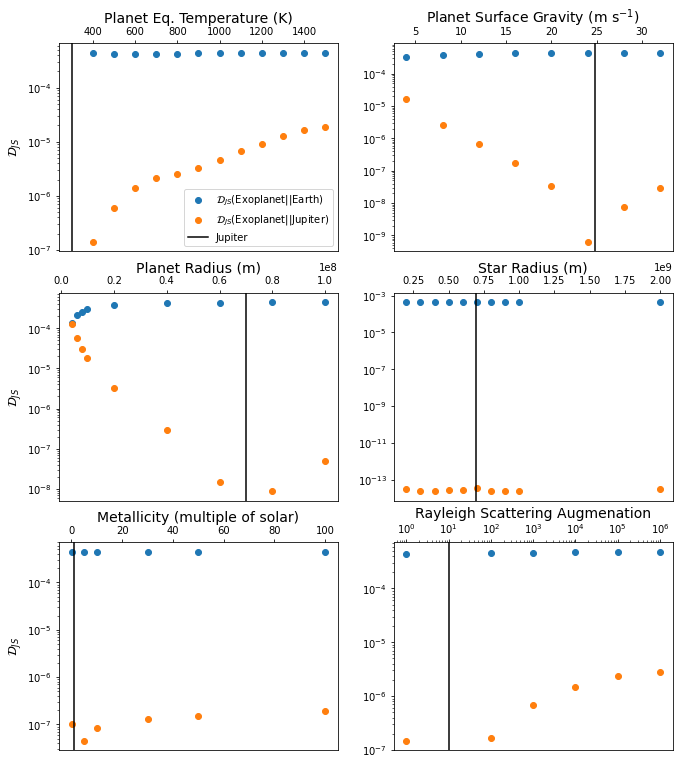

In [25]:
# creating a plot looking at how changing each of the 6 parameters affects D_js
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(11, 13))
#plt.figure(figsize=(9, 11.5), dpi=100)

# temperature
ax[0,0].scatter(temps, temp_djs_earth, label='$\mathcal{D}_{JS}$(Exoplanet||Earth)')
ax[0,0].scatter(temps, temp_djs_jupiter, label='$\mathcal{D}_{JS}$(Exoplanet||Jupiter)')
ax[0,0].set_xlabel('Planet Eq. Temperature (K)', fontsize=14)
ax[0,0].axvline(300, 0, 1, color='black', label='Jupiter')
#ax[0,0].set_ylim(9e-8, 7e-4)

# surface gravity
ax[0,1].scatter(gravs, grav_djs_earth)
ax[0,1].scatter(gravs, grav_djs_jupiter)
ax[0,1].set_xlabel('Planet Surface Gravity (m s$^{-1}$)', fontsize=14)
ax[0,1].axvline(24.79, 0, 1, color='black')
#ax[0,1].set_ylim(3e-10, 9e-4)

# planet radius
ax[1,0].scatter(planet_rads, planet_rad_djs_earth)
ax[1,0].scatter(planet_rads, planet_rad_djs_jupiter)
ax[1,0].set_xlabel('Planet Radius (m)', fontsize=14)
ax[1,0].axvline(6.99e7, 0, 1, color='black')
#ax[1,0].set_ylim(5e-9, 8e-4)

# star radius
ax[1,1].scatter(star_rads, star_rad_djs_earth)
ax[1,1].scatter(star_rads, star_rad_djs_jupiter)
ax[1,1].set_xlabel('Star Radius (m)', fontsize=14)
ax[1,1].axvline(6.96e8, 0, 1, color='black')
#ax[1,1].set_ylim(3e-15, 2e-3)

## cloud pressure
#ax[2,0].scatter(pressures, clouds_djs_earth, label='vs Earth')
#ax[2,0].scatter(pressures, clouds_djs_jupiter, label='vs Jupiter')
#ax[2,0].set_xlabel('Pressure at Cloud Top (Pa)', fontsize=14)
#ax[2,0].axvline(70000, 0, 1, color='darkorange', label='Jupiter')
##ax[2,0].set_ylim(1e-14, 1e-3)
#ax[2,0].set_xscale('log')

# metallicity
ax[2,0].scatter(metallicities, metallicity_djs_earth)
ax[2,0].scatter(metallicities, metallicity_djs_jupiter)
ax[2,0].set_xlabel('Metallicity (multiple of solar)', fontsize=14)
ax[2,0].axvline(1, 0, 1, color='black')
##ax[2,0].set_ylim(1e-14, 1e-3)
#ax[2,0].set_xscale('log')

# Rayleigh scattering
ax[2,1].scatter(rayleighs, rayleigh_djs_earth)
ax[2,1].scatter(rayleighs, rayleigh_djs_jupiter)
ax[2,1].set_xlabel('Rayleigh Scattering Augmenation', fontsize=14)
ax[2,1].axvline(10, 0, 1, color='black')
#ax[2,1].set_ylim(5e-8, 7e-4)
ax[2,1].set_xscale('log')



#really only need legend once....
#ax[0,0].legend(bbox_to_anchor=(0., 1.2, 2.2, .102), loc=3, ncol=4, mode="expand", fontsize='large', shadow=True )
#fig.legend(loc='upper center', borderaxespad=0.1, fontsize='medium', shadow=True, mode='expand')
#plt.subplots_adjust(down=0.85)
ax[0,0].legend()


for i in range(3):
    ax[i,0].set_ylabel('$\mathcal{D}_{JS}$', fontsize=12)
    for j in range(2):
        ax[i,j].set_yscale('log')
        ax[i,j].xaxis.set_label_position('top')
        ax[i,j].xaxis.tick_top()
        

plt.savefig('djs_by_parameter_sara.png')
#plt.show()



In [26]:
# loading a 1200K jupiter like exoplanet
jup_1200_wave, jup_1200_trans = np.loadtxt('/Users/saravannah/betelgeuse/single_param_jup_variants/jup_temp/jupiter_1200K.txt', unpack=True, skiprows=2)

# loading the hot jupiter spectra
path_hot = '/Users/saravannah/Exo_Transmit/Spectra/hotJups/'
names_hot = listdir(path_hot)
#names_hot.pop(1)

#remove .DS_Store and any other weird file stuff
names_hot = [n for n in names_hot if '.dat' in n]

print(names_hot[0])

spectra_hot = [np.loadtxt(path_hot+n, unpack=True, skiprows=2) for n in names_hot]

WASP39b.dat


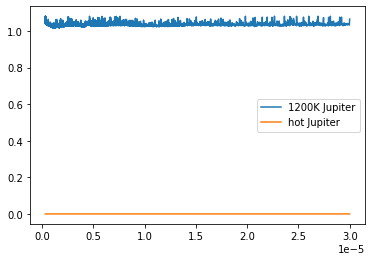

In [27]:
plt.plot(jup_1200_wave, jup_1200_trans, label='1200K Jupiter')
plt.plot(spectra_hot[0][0], spectra_hot[0][0], label='hot Jupiter')
plt.legend()

In [28]:
###### FIX THIS
#clearly a mistake; Djs values are way too big

hot_djs_earth = []
for n in range(10):
    hot_djs_earth.append(get_djs(spectra_hot[n][1], earth_trans))
    
hot_djs_jupiter = []
for n in range(10):
    hot_djs_jupiter.append(get_djs(spectra_hot[n][1], jupiter_trans))
    
hot_djs_jupiter12k = []
for n in range(10):
    hot_djs_jupiter12k.append(get_djs(spectra_hot[n][1], jup_1200_trans))

Text(0, 0.5, '$D_{JS}$')

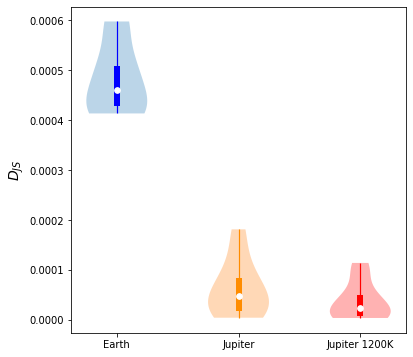

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.violinplot(hot_djs_earth, [0], points=100, widths=0.5, showextrema=False)
mi, q1, med, q3, ma = np.percentile(hot_djs_earth, [0, 25, 50, 75, 100])
ax.scatter(0, med, marker='o', color='white', s=32, zorder=3)
ax.vlines(0, q1, q3, color='b', linestyle='-', lw=6)
ax.vlines(0, mi, ma, color='b', linestyle='-', lw=1.2)

ax.violinplot(hot_djs_jupiter, [1], points=100, widths=0.5, showextrema=False)
mi, q1, med, q3, ma = np.percentile(hot_djs_jupiter, [0, 25, 50, 75, 100])
ax.scatter(1, med, marker='o', color='white', s=32, zorder=3)
ax.vlines(1, q1, q3, color='darkorange', linestyle='-', lw=6)
ax.vlines(1, mi, ma, color='darkorange', linestyle='-', lw=1.2)

violin_parts = ax.violinplot(hot_djs_jupiter12k, [2], points=100, widths=0.5, showextrema=False)
plt.setp(violin_parts['bodies'], facecolor='red')
mi, q1, med, q3, ma = np.percentile(hot_djs_jupiter12k, [0, 25, 50, 75, 100])
ax.scatter(2, med, marker='o', color='white', s=32, zorder=3)
ax.vlines(2, q1, q3, color='r', linestyle='-', lw=6)
ax.vlines(2, mi, ma, color='r', linestyle='-', lw=1.2)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Earth', 'Jupiter', 'Jupiter 1200K'])
ax.set_ylabel('$D_{JS}$', size=14)

In [30]:
# loading the super earth spectra
path_sup = '/Users/saravannah/Exo_Transmit/Spectra/supEarths_v2/'
names_sup = listdir(path_sup)
#names_sup.pop(0)

#remove .DS_Store and any other weird file stuff
names_sup = [n for n in names_sup if '.dat' in n]
print(names_sup)

spectra_sup = [np.loadtxt(path_sup+n, unpack=True, skiprows=2) for n in names_sup]

['EPIC24983012b.dat', 'Proximab.dat', 'Trappist1e.dat', 'CDCetb.dat', 'GJ667Cc.dat', 'sim2.dat', 'sim3.dat', 'sim1.dat', 'sim4.dat', 'GJ15Ab.dat']


In [31]:
#just grabbed this from SO https://stackoverflow.com/questions/2170900/get-first-list-index-containing-sub-string
#finds index in list of first element containing a particular substring
#helpful for parsing planet names into a dictionary

def index_containing_substring(the_list, substring):
    for i, s in enumerate(the_list):
        if substring in s:
              return i
    return -1
print(index_containing_substring(names_sup, 'Trappist'))

2


In [107]:
hot_Jups = {'HAT-P-1b':index_containing_substring(names_hot, '1b'), 
              'HAT-P-12b':index_containing_substring(names_hot, '12b'),
              'HD 189733b': index_containing_substring(names_hot, '1897'),
             'HD 209458b': index_containing_substring(names_hot, '20945'),
             'WASP-6b': index_containing_substring(names_hot, '6b'),
             'WASP-39b': index_containing_substring(names_hot, '39b'),
             'Simulated hot Jupiter 1': index_containing_substring(names_hot, 'sim1'),
             'Simulated hot Jupiter 2': index_containing_substring(names_hot, 'sim2'),
             'Simulated hot Jupiter 3': index_containing_substring(names_hot, 'sim3'),
             'Simulated hot Jupiter 4': index_containing_substring(names_hot, 'sim4')}

sup_Earths = {'Proxima b':index_containing_substring(names_sup, 'Proxima'), 
              'Trappist-1e':index_containing_substring(names_sup, 'Trappist'),
              'GJ 15 Ab': index_containing_substring(names_sup, 'GJ15'),
             'GJ 667 Cc': index_containing_substring(names_sup, 'GJ667'),
             'CD Cet b': index_containing_substring(names_sup, 'CD'),
             'EPIC 24983012b': index_containing_substring(names_sup, 'EPIC'),
             'Simulated super-Earth 1': index_containing_substring(names_sup, 'sim1'),
             'Simulated super-Earth 2': index_containing_substring(names_sup, 'sim2'),
             'Simulated super-Earth 3': index_containing_substring(names_sup, 'sim3'),
             'Simulated super-Earth 4': index_containing_substring(names_sup, 'sim4')}



In [108]:
print(index_containing_substring(names_hot, 'sim4'))

8


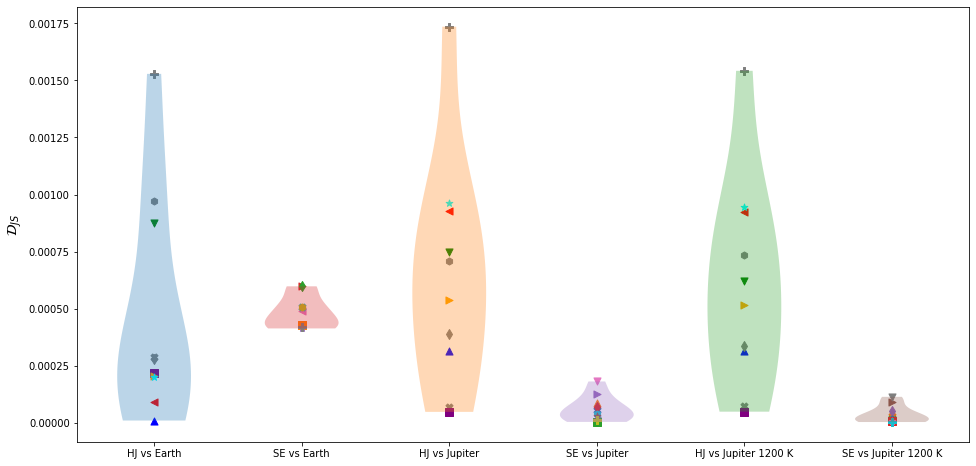

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

markers = ['v', '^','<','>','s', '*', 'h', 'd','P','X']
colors = ['green', 'blue', 'red', 'orange', 'purple', 'cyan', 'gray', 'gray', 'gray', 'gray']

#holder for djs distributions
super_earth_djs =[[],[],[]]
for key in sup_Earths.keys():
    #get djs values
    djs_supearth_earth = get_djs(spectra_sup[sup_Earths[key]][1], earth_trans)
    djs_supearth_jupiter = get_djs(spectra_sup[sup_Earths[key]][1], jupiter_trans)
    djs_supearth_jupiter12k = get_djs(spectra_sup[sup_Earths[key]][1], jup_1200_trans)
    super_earth_djs[0].append(djs_supearth_earth)
    super_earth_djs[1].append(djs_supearth_jupiter)
    super_earth_djs[2].append(djs_supearth_jupiter12k)
    
    
    #plot djs values (note only need to be labeled once)
    ax.scatter(0, djs_supearth_earth, marker=markers[sup_Earths[key]], s=50, color=colors[sup_Earths[key]], label=key)
    ax.scatter(2, djs_supearth_jupiter, marker=markers[sup_Earths[key]], s=50, color=colors[sup_Earths[key]])
    ax.scatter(4, djs_supearth_jupiter12k, marker=markers[sup_Earths[key]], s=50, color=colors[sup_Earths[key]])
    
#add violin plots
ax.violinplot(super_earth_djs[0], [0], points=100, widths=0.5, showextrema=False)
plt.setp(violin_parts['bodies'], facecolor='blue')
ax.violinplot(super_earth_djs[1], [2], points=100, widths=0.5, showextrema=False)
ax.violinplot(super_earth_djs[2], [4], points=100, widths=0.5, showextrema=False)
    

#holder for djs distributions
hot_jup_djs =[[],[],[]]
for key in hot_Jups.keys():  
    djs_hotjup_earth = get_djs(spectra_hot[hot_Jups[key]][1], earth_trans)
    djs_hotjup_jupiter = get_djs(spectra_hot[hot_Jups[key]][1], jupiter_trans)
    djs_hotjup_jupiter12k = get_djs(spectra_hot[hot_Jups[key]][1], jup_1200_trans)
    hot_jup_djs[0].append(djs_hotjup_earth)
    hot_jup_djs[1].append(djs_hotjup_jupiter)
    hot_jup_djs[2].append(djs_hotjup_jupiter12k)
    
    ax.scatter(1, djs_hotjup_earth, marker=markers[hot_Jups[key]], s=50, label=key)
    ax.scatter(3, djs_hotjup_jupiter, marker=markers[hot_Jups[key]], s=50)
    ax.scatter(5, djs_hotjup_jupiter12k, marker=markers[hot_Jups[key]], s=50)
    
#add violin plots
ax.violinplot(hot_jup_djs[0], [1], points=100, widths=0.5, showextrema=False)
plt.setp(violin_parts['bodies'], facecolor='blue')
ax.violinplot(hot_jup_djs[1], [3], points=100, widths=0.5, showextrema=False)
ax.violinplot(hot_jup_djs[2], [5], points=100, widths=0.5, showextrema=False)
    
    
#ax[0].set_xticks([0, 1, 2])
#ax[0].set_xticklabels(['Super-Earth||Earth', 'Super-Earth||Jupiter', 'Super-Earth||1200K Jupiter'])
#ax[0].set_ylabel('$D_{JS}$', size=14)

ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['HJ vs Earth', 'SE vs Earth', 'HJ vs Jupiter', 'SE vs Jupiter',
                    'HJ vs Jupiter 1200 K', 'SE vs Jupiter 1200 K'])
ax.set_ylabel('$\mathcal{D}_{JS}$', size=14)

plt.show()

#ax[0].legend(bbox_to_anchor=(0.9, 1.1), shadow=True)
#ax[1].legend(bbox_to_anchor=(0.9, 1.1), shadow=True)



#ax[0].legend()
#ax[1].legend()


In [110]:
print('sd' in 'asdf')

True


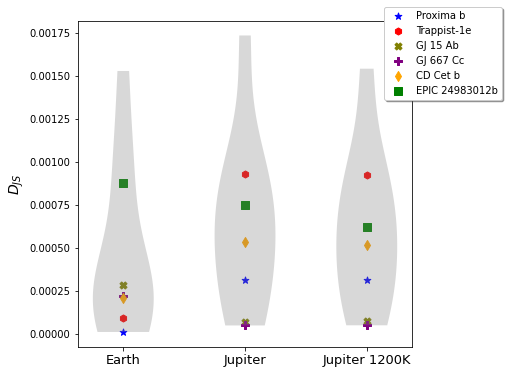

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

markers = ['s', '*', 'h', 'd','P','>','v','^','<','X']


#holder for djs distributions
super_earth_djs =[[],[],[]]
for key in sup_Earths.keys():
    #get djs values
    djs_supearth_earth = get_djs(spectra_sup[sup_Earths[key]][1], earth_trans)
    djs_supearth_jupiter = get_djs(spectra_sup[sup_Earths[key]][1], jupiter_trans)
    djs_supearth_jupiter12k = get_djs(spectra_sup[sup_Earths[key]][1], jup_1200_trans)
    super_earth_djs[0].append(djs_supearth_earth)
    super_earth_djs[1].append(djs_supearth_jupiter)
    super_earth_djs[2].append(djs_supearth_jupiter12k)
    
    
    #plot djs values (note only need to be labeled once)
    if 'Sim' not in key:
        ax.scatter(0, djs_supearth_earth, marker=markers[sup_Earths[key]], s=50, color=get_color(key), label=key)
        ax.scatter(1, djs_supearth_jupiter, marker=markers[sup_Earths[key]], s=50, color=get_color(key))
        ax.scatter(2, djs_supearth_jupiter12k, marker=markers[sup_Earths[key]], s=50, color=get_color(key))
               

    
#add violin plots
v1 = ax.violinplot(super_earth_djs[0], [0], points=100, widths=0.5, showextrema=False)
plt.setp(v1['bodies'], facecolor='gray')
v2 =ax.violinplot(super_earth_djs[1], [1], points=100, widths=0.5, showextrema=False)
plt.setp(v2['bodies'], facecolor='gray')
v3 =ax.violinplot(super_earth_djs[2], [2], points=100, widths=0.5, showextrema=False)
plt.setp(v3['bodies'], facecolor='gray')
    
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
#ax[0].set_xticks([0, 1, 2])
#ax[0].set_xticklabels(['Super-Earth||Earth', 'Super-Earth||Jupiter', 'Super-Earth||1200K Jupiter'])
#ax[0].set_ylabel('$D_{JS}$', size=14)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Super Earth vs Earth', 'Super Earth vs Earth', 'Super Earth vs Jupiter'])
ax.set_ylabel('$\mathcal{D}_{JS}$', size=14)


ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Earth', 'Jupiter', 'Jupiter 1200K'], fontsize=13)
#ax.set_xticklabels(['Super-Earth||Earth', 'Super-Earth||Jupiter', 'Super-Earth||1200K Jupiter'])
ax.set_ylabel('$D_{JS}$', size=14)

ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.9),shadow=True)

plt.savefig('super_earths_violin.pdf', bbox_inches="tight")

In [124]:
def get_color(string):
    colors = ['green', 'blue', 'red', 'orange', 'purple', 'cyan','pink','yellow', 'lime', 'olive']
    if 'Sim' in string:
        return 'gray'
    else:
        return colors[hot_Jups[string]]
    

In [125]:
print(hot_Jups)

{'HAT-P-1b': 1, 'HAT-P-12b': 3, 'HD 189733b': 2, 'HD 209458b': 9, 'WASP-6b': 7, 'WASP-39b': 0, 'Simulated hot Jupiter 1': 6, 'Simulated hot Jupiter 2': 4, 'Simulated hot Jupiter 3': 5, 'Simulated hot Jupiter 4': 8}


key is  HAT-P-1b
key is  HAT-P-12b
key is  HD 189733b
key is  HD 209458b
key is  WASP-6b
key is  WASP-39b


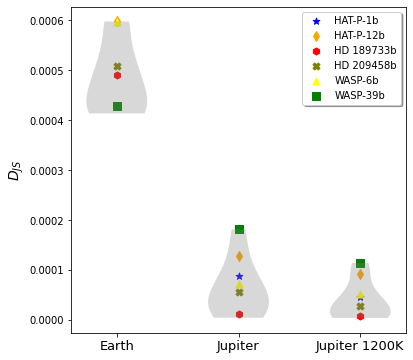

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

markers = ['s', '*', 'h', 'd','P','>','v','^','<','X']


#holder for djs distributions
hot_jup_djs =[[],[],[]]
for key in hot_Jups.keys():  
    djs_hotjup_earth = get_djs(spectra_hot[hot_Jups[key]][1], earth_trans)
    djs_hotjup_jupiter = get_djs(spectra_hot[hot_Jups[key]][1], jupiter_trans)
    djs_hotjup_jupiter12k = get_djs(spectra_hot[hot_Jups[key]][1], jup_1200_trans)
    hot_jup_djs[0].append(djs_hotjup_earth)
    hot_jup_djs[1].append(djs_hotjup_jupiter)
    hot_jup_djs[2].append(djs_hotjup_jupiter12k)
    
    if 'Sim' not in key:
        print('key is ', key)
        ax.scatter(0, djs_hotjup_earth, marker=markers[hot_Jups[key]], s=50, color=get_color(key), label=key)
        ax.scatter(1, djs_hotjup_jupiter, marker=markers[hot_Jups[key]], color=get_color(key), s=50)
        ax.scatter(2, djs_hotjup_jupiter12k, marker=markers[hot_Jups[key]], color=get_color(key), s=50)
               

    
#add violin plots
v1 = ax.violinplot(hot_jup_djs[0], [0], points=100, widths=0.5, showextrema=False)
plt.setp(v1['bodies'], facecolor='gray')
v2 =ax.violinplot(hot_jup_djs[1], [1], points=100, widths=0.5, showextrema=False)
plt.setp(v2['bodies'], facecolor='gray')
v3 =ax.violinplot(hot_jup_djs[2], [2], points=100, widths=0.5, showextrema=False)
plt.setp(v3['bodies'], facecolor='gray')
    
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
#ax[0].set_xticks([0, 1, 2])
#ax[0].set_xticklabels(['Super-Earth||Earth', 'Super-Earth||Jupiter', 'Super-Earth||1200K Jupiter'])
#ax[0].set_ylabel('$D_{JS}$', size=14)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Super Earth vs Earth', 'Super Earth vs Earth', 'Super Earth vs Jupiter'])
ax.set_ylabel('$\mathcal{D}_{JS}$', size=14)


ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Earth', 'Jupiter', 'Jupiter 1200K'], fontsize=13)
#ax.set_xticklabels(['Super-Earth||Earth', 'Super-Earth||Jupiter', 'Super-Earth||1200K Jupiter'])
ax.set_ylabel('$D_{JS}$', size=14)

ax.legend(shadow=True)

plt.savefig('hot_jupiters_violin.pdf', bbox_inches="tight")

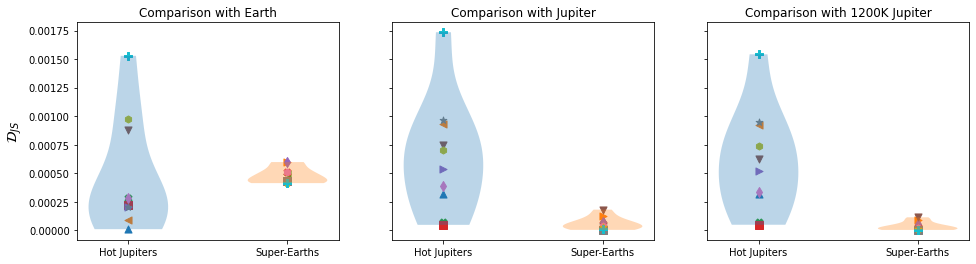

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), sharey=True)

markers = ['v', '^','<','>','s', '*', 'h', 'd','P','X']
colors = ['green', 'blue', 'red', 'orange', 'purple', 'cyan', 'gray', 'gray', 'gray', 'gray']


#holder for djs distributions
super_earth_djs =[[],[],[]]
for key in sup_Earths.keys():
    #get djs values
    djs_supearth_earth = get_djs(spectra_sup[sup_Earths[key]][1], earth_trans)
    djs_supearth_jupiter = get_djs(spectra_sup[sup_Earths[key]][1], jupiter_trans)
    djs_supearth_jupiter12k = get_djs(spectra_sup[sup_Earths[key]][1], jup_1200_trans)
    super_earth_djs[0].append(djs_supearth_earth)
    super_earth_djs[1].append(djs_supearth_jupiter)
    super_earth_djs[2].append(djs_supearth_jupiter12k)
    
    
    #plot djs values (note only need to be labeled once)
    ax[0].scatter(0, djs_supearth_earth, marker=markers[sup_Earths[key]], s=50, label=key)
    ax[1].scatter(0, djs_supearth_jupiter, marker=markers[sup_Earths[key]], s=50)
    ax[2].scatter(0, djs_supearth_jupiter12k, marker=markers[sup_Earths[key]], s=50)
    
#add violin plots
ax[0].violinplot(super_earth_djs[0], [0], points=100, widths=0.5, showextrema=False)
ax[1].violinplot(super_earth_djs[1], [0], points=100, widths=0.5, showextrema=False)
ax[2].violinplot(super_earth_djs[2], [0], points=100, widths=0.5, showextrema=False)
    

#holder for djs distributions
hot_jup_djs =[[],[],[]]
for key in hot_Jups.keys():  
    djs_hotjup_earth = get_djs(spectra_hot[hot_Jups[key]][1], earth_trans)
    djs_hotjup_jupiter = get_djs(spectra_hot[hot_Jups[key]][1], jupiter_trans)
    djs_hotjup_jupiter12k = get_djs(spectra_hot[hot_Jups[key]][1], jup_1200_trans)
    hot_jup_djs[0].append(djs_hotjup_earth)
    hot_jup_djs[1].append(djs_hotjup_jupiter)
    hot_jup_djs[2].append(djs_hotjup_jupiter12k)
    
    ax[0].scatter(1, djs_hotjup_earth, marker=markers[hot_Jups[key]], s=50, label=key)
    ax[1].scatter(1, djs_hotjup_jupiter, marker=markers[hot_Jups[key]], s=50)
    ax[2].scatter(1, djs_hotjup_jupiter12k, marker=markers[hot_Jups[key]], s=50)
    
#add violin plots
ax[0].violinplot(hot_jup_djs[0], [1], points=100, widths=0.5, showextrema=False)
ax[1].violinplot(hot_jup_djs[1], [1], points=100, widths=0.5, showextrema=False)
ax[2].violinplot(hot_jup_djs[2], [1], points=100, widths=0.5, showextrema=False)
  
    
    
ax[0].set_title('Comparison with Earth')    
ax[1].set_title('Comparison with Jupiter') 
ax[2].set_title('Comparison with 1200K Jupiter') 


for axs in ax:
    axs.set_xticks([0,1])
    axs.set_xticklabels(['Hot Jupiters', 'Super-Earths'])
    
ax[0].set_ylabel('$\mathcal{D}_{JS}$', size=14)

plt.show()


In [177]:
print('Earth')
sup_djs_earth = []
for n in range(10):
    sup_djs_earth.append(get_djs(spectra_sup[n][1], earth_trans))
    print(get_djs(spectra_sup[n][1], earth_trans))
    
print('Jupiter')
sup_djs_jupiter = []
for n in range(10):
    sup_djs_jupiter.append(get_djs(spectra_sup[n][1], jupiter_trans))
    print(get_djs(spectra_sup[n][1], jupiter_trans))

print('1200 K Jupiter')
sup_djs_jupiter12k = []
for n in range(10):
    sup_djs_jupiter12k.append(get_djs(spectra_sup[n][1], jup_1200_trans))
    print(get_djs(spectra_sup[n][1], jup_1200_trans))

Earth
0.0008768455176290581
1.0077279234098834e-05
9.191827330084156e-05
0.00020652273919979838
0.00021866002202433447
0.00020153194433316442
0.0009728417551740642
0.00028167031661846553
0.0015283751750385143
0.0002861893604115774
Jupiter
0.0007495743122130048
0.0003152342082034345
0.0009295693134775767
0.0005360124196833746
4.80318736446779e-05
0.0009644321730779871
0.0007068701570781379
0.00038843485317059494
0.0017349674391548926
6.928315559656795e-05
1200 K Jupiter
0.000620983100182642
0.00031475670349182384
0.000923010255305644
0.0005182012195861789
4.8896416685144384e-05
0.0009472668004392223
0.000734256620772907
0.00033530782706791065
0.0015417344126457061
7.194065257267677e-05


In [99]:
import os
test = names_sup[0]
print()

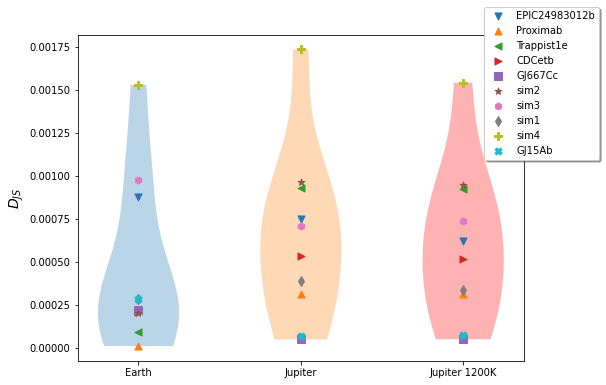

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

ax.violinplot(sup_djs_earth, [0], points=100, widths=0.5, showextrema=False)
mi, q1, med, q3, ma = np.percentile(sup_djs_earth, [0, 25, 50, 75, 100])
#ax.scatter(0, med, marker='o', color='white', s=32, zorder=3)
#ax.vlines(0, q1, q3, color='b', linestyle='-', lw=6)
#ax.vlines(0, mi, ma, color='b', linestyle='-', lw=1.2)

markers = ['v', '^','<','>','s', '*', 'h', 'd','P','X']


for i in range(len(names_sup)):
    n = os.path.splitext(names_sup[i])[0]
    ax.scatter(0, sup_djs_earth[i], marker=markers[i], s=50, label=n)




ax.violinplot(sup_djs_jupiter, [1], points=100, widths=0.5, showextrema=False)
#mi, q1, med, q3, ma = np.percentile(sup_djs_jupiter, [0, 25, 50, 75, 100])
#ax.scatter(1, med, marker='o', color='white', s=32, zorder=3)
#ax.vlines(1, q1, q3, color='darkorange', linestyle='-', lw=6)
#ax.vlines(1, mi, ma, color='darkorange', linestyle='-', lw=1.2)


for i in range(len(names_sup)):
    ax.scatter(1, sup_djs_jupiter[i], marker=markers[i], s=50)

violin_parts = ax.violinplot(sup_djs_jupiter12k, [2], points=100, widths=0.5, showextrema=False)
plt.setp(violin_parts['bodies'], facecolor='red')
#mi, q1, med, q3, ma = np.percentile(sup_djs_jupiter12k, [0, 25, 50, 75, 100])
#ax.scatter(2, med, marker='o', color='white', s=32, zorder=3)
#ax.vlines(2, q1, q3, color='r', linestyle='-', lw=6)
#ax.vlines(2, mi, ma, color='r', linestyle='-', lw=1.2)


for i in range(len(names_sup)):
    ax.scatter(2, sup_djs_jupiter12k[i], marker=markers[i], s=50)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Earth', 'Jupiter', 'Jupiter 1200K'])
ax.set_ylabel('$D_{JS}$', size=14)


ax.legend(bbox_to_anchor=(0.9, 1.1), shadow=True)


plt.savefig('super_earth_djs.png')

Text(0, 0.5, '$\\mathcal{D}_{JS}$')

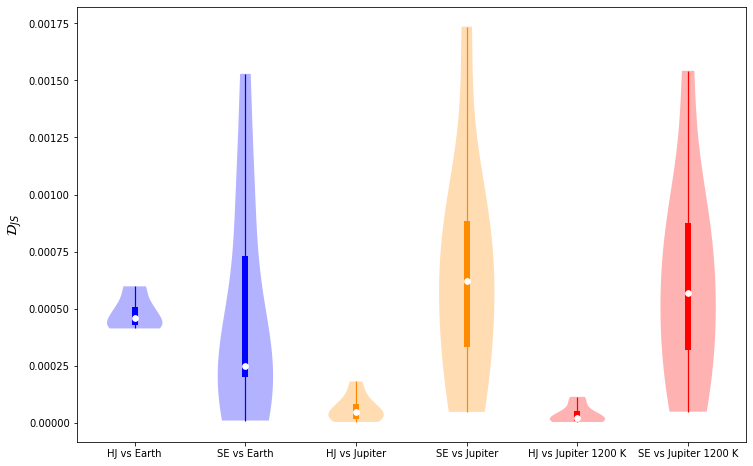

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

v1 = ax.violinplot(hot_djs_earth, [0], points=100, widths=0.5, showextrema=False)
plt.setp(v1['bodies'], facecolor='blue')
mi, q1, med, q3, ma = np.percentile(hot_djs_earth, [0, 25, 50, 75, 100])
ax.scatter(0, med, marker='o', color='white', s=32, zorder=3)
ax.vlines(0, q1, q3, color='b', linestyle='-', lw=6)
ax.vlines(0, mi, ma, color='b', linestyle='-', lw=1.2)

v1 = ax.violinplot(sup_djs_earth, [1], points=100, widths=0.5, showextrema=False)
plt.setp(v1['bodies'], facecolor='blue')
mi, q1, med, q3, ma = np.percentile(sup_djs_earth, [0, 25, 50, 75, 100])
ax.scatter(1, med, marker='o', color='white', s=32, zorder=3)
ax.vlines(1, q1, q3, color='b', linestyle='-', lw=6)
ax.vlines(1, mi, ma, color='b', linestyle='-', lw=1.2)

v2 = ax.violinplot(hot_djs_jupiter, [2], points=100, widths=0.5, showextrema=False)
plt.setp(v2['bodies'], facecolor='darkorange')
mi, q1, med, q3, ma = np.percentile(hot_djs_jupiter, [0, 25, 50, 75, 100])
ax.scatter(2, med, marker='o', color='white', s=32, zorder=3)
ax.vlines(2, q1, q3, color='darkorange', linestyle='-', lw=6)
ax.vlines(2, mi, ma, color='darkorange', linestyle='-', lw=1.2)

v2 = ax.violinplot(sup_djs_jupiter, [3], points=100, widths=0.5, showextrema=False)
plt.setp(v2['bodies'], facecolor='darkorange')
mi, q1, med, q3, ma = np.percentile(sup_djs_jupiter, [0, 25, 50, 75, 100])
ax.scatter(3, med, marker='o', color='white', s=32, zorder=3)
ax.vlines(3, q1, q3, color='darkorange', linestyle='-', lw=6)
ax.vlines(3, mi, ma, color='darkorange', linestyle='-', lw=1.2)

violin_parts = ax.violinplot(hot_djs_jupiter12k, [4], points=100, widths=0.5, showextrema=False)
plt.setp(violin_parts['bodies'], facecolor='red')
mi, q1, med, q3, ma = np.percentile(hot_djs_jupiter12k, [0, 25, 50, 75, 100])
ax.scatter(4, med, marker='o', color='white', s=32, zorder=3)
ax.vlines(4, q1, q3, color='r', linestyle='-', lw=6)
ax.vlines(4, mi, ma, color='r', linestyle='-', lw=1.2)

violin_parts = ax.violinplot(sup_djs_jupiter12k, [5], points=100, widths=0.5, showextrema=False)
plt.setp(violin_parts['bodies'], facecolor='red')
mi, q1, med, q3, ma = np.percentile(sup_djs_jupiter12k, [0, 25, 50, 75, 100])
ax.scatter(5, med, marker='o', color='white', s=32, zorder=3)
ax.vlines(5, q1, q3, color='r', linestyle='-', lw=6)
ax.vlines(5, mi, ma, color='r', linestyle='-', lw=1.2)

ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['HJ vs Earth', 'SE vs Earth', 'HJ vs Jupiter', 'SE vs Jupiter',
                    'HJ vs Jupiter 1200 K', 'SE vs Jupiter 1200 K'])
ax.set_ylabel('$\mathcal{D}_{JS}$', size=14)


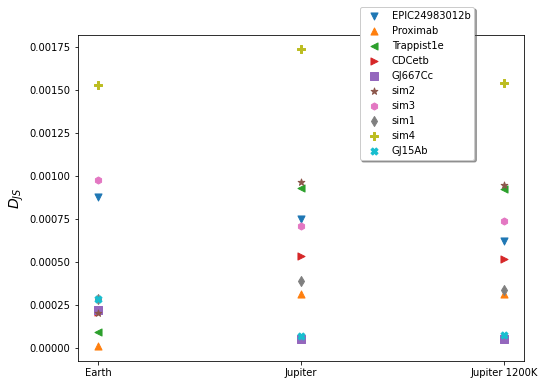

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

markers = ['v', '^','<','>','s', '*', 'h', 'd','P','X']


for i in range(len(names_sup)):
    n = os.path.splitext(names_sup[i])[0]
    ax.scatter(0, sup_djs_earth[i], marker=markers[i], s=50, label=n)
    
for i in range(len(names_sup)):
    ax.scatter(1, sup_djs_jupiter[i], marker=markers[i], s=50)
    
for i in range(len(names_sup)):
    ax.scatter(2, sup_djs_jupiter12k[i], marker=markers[i], s=50)
    
    
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Earth', 'Jupiter', 'Jupiter 1200K'])
ax.set_ylabel('$D_{JS}$', size=14)


ax.legend(bbox_to_anchor=(0.9, 1.1), shadow=True)
